<div style="text-align:center; border: 2px solid #2E86C1; border-radius: 10px; padding: 30px; background-color: #F4F6F7;">

<h1 style="color:#154360; font-family:'Georgia', serif; font-size: 2.8em; margin-bottom: 20px;">APS106: Fundamentals of Computer Programming</h1>

<h2 style="color:#1A5276; font-family:'Palatino Linotype', 'Book Antiqua', serif; font-size: 2.0em; margin-bottom: 30px;">Tutorial 11, Week 12</h2>

<h3 style="color:#6C3483; font-family:'Cambria', serif; font-size: 1.8em; text-decoration: underline; margin-bottom: 15px;">Topics Covered</h3>
<p style="text-align:center; font-family:'Trebuchet MS', sans-serif; font-size: 1.3em; line-height: 1.8;">
  <span style="color:#D35400; font-weight:bold;">Programming Concepts (revisiting)</span><br>
  <span style="color:#283747;">• CSV</span><br>
  <span style="color:#283747;">• Pandas</span><br> 
  <span style="color:#283747;">• Object-Oriented Programming (OOP)</span><br>
</p>

<h3 style="color:#6C3483; font-family:'Cambria', serif; font-size: 1.8em; text-decoration: underline; margin-bottom: 15px;">Goals for This Tutorial</h3>
<p style="text-align:center; font-family:'Verdana', sans-serif; font-size: 1.2em; line-height: 1.8;">
  <span style="color:#21618C;">• Introduction to CSV files, use cases, reading them with the `csv` module.</span><br> 
  <span style="color:#21618C;">• A brief look at why Pandas is useful, and a single practice question combining various Pandas features.</span><br> 
  <span style="color:#21618C;">• Focusing on printing objects (`__str__`), and designing interesting OOP(class)-based solutions.</span><br>
</p>
</div>




# Table of Contents

1. [CSV Module in Python](#1-csv-module-in-python)  
   - [Practice Problem: CSV Module](#practice-problem-csv-module)

2. [Pandas](#2-pandas) 
   - [Practice Problem: Using Pandas for data manipulation](#practice-problem-using-pandas-for-data-manipulation)

3. [Object-Oriented Programming (OOP)](#3-object-oriented-programming-oop)  
   - [Printing Objects in Python](#printing-objects-in-python)  
   - [Practice Problem: Write a class named `Student`](#practice-problem-write-a-class-named-student)  
   - [Practice Problem: OOP + CSV](#practice-problem-oop--csv)  
   - [Practice Problem: OOP + File I/O](#practice-problem-oop--file-io)

4. [Exam-style Question](#exam-style-question)

## 1. CSV Module in Python <a name="1-csv-module-in-python"></a>

#### What is a CSV file?
- CSV stands for "Comma-Separated Values".
- A CSV file is a plaintext format where each line typically represents a row, and each value within the row is separated by a delimiter (commonly a comma).
- Commonly used for data exchange, simple data storage, and as input-output for many software applications.

#### Why use the `csv` module?
- The `csv` module in Python provides a simple interface to read and write CSV files.
- It handles splitting lines on the appropriate delimiter, which helps avoid manual string parsing errors.

Below is an example of using the `csv` module to read from a file.


In [1]:
# EXAMPLE: Reading from a CSV using the csv module
import csv

with open('data.csv', mode='r', newline='') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        print(row)


['name', 'age', 'department']
['John', '25', 'Engineering']
['Jane', '30', 'Marketing']
['Bob', '22', 'Human Resources']


#### Writing to a CSV File with `csv.writer`

In addition to reading CSV files, we can also create or modify them using `csv.writer`. 
Below is a minimal example:


In [2]:
import csv

data_to_write = [
    ["student_id", "exam1", "exam2", "exam3"],
    ["S101", "85", "90", "88"],
    ["S102", "78", "92", "80"],
]

# EXAMPLE: Writing to a CSV using the csv module
with open('new_student_grades.csv', mode='w', newline='') as file:
    csv_writer = csv.writer(file)
    for row in data_to_write:
        csv_writer.writerow(row)

print("Data has been written to 'new_student_grades.csv'.")


Data has been written to 'new_student_grades.csv'.


#### Practice Problem: CSV Module <a name="practice-problem-csv-module"></a>
Suppose you are given a CSV file named `student_grades.csv`.

1. Read this file using the `csv` module.  
2. Compute the average score for each student across the three exams.  
3. Add average score of each student as a column to the csv file.  
4. For this csv file, calculate statistics such as mean, highest, lowest score and write them in a `stats.txt` file.


In [ ]:
# TODO:

In [ ]:
import csv

# Step 1: Read the 'student_grades.csv' file
input_file = 'student_grades.csv'
output_file = 'student_grades_with_avg.csv'  # We'll create a new file with the additional "average" column.
stats_file = 'stats.txt'

student_data = []
header = []

with open(input_file, mode='r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    first_line = True  # Flag to identify the header
    for row in csv_reader:
        if first_line:
            header = row  # Save the header row
            first_line = False
        else:
            student_data.append(row)

# Step 2: Compute the average score for each student
# We'll assume the exams are in columns: exam1, exam2, exam3
# and they are all integers or floats. 
averages = []
for row in student_data:
    # example row: ['S101', '80', '90', '85']
    exam1 = float(row[1])
    exam2 = float(row[2])
    exam3 = float(row[3])
    
    avg_score = (exam1 + exam2 + exam3) / 3
    averages.append(avg_score)

# Step 3: Add average score to each row and write out to a new CSV
# We'll modify the header to include "average"
header_with_avg = header + ['average']

# Combine the data back with the averages
for i in range(len(student_data)):
    row = student_data[i]
    row.append(str(round(averages[i], 2)))  # rounding to 2 decimal places

with open(output_file, mode='w') as out_csv:
    csv_writer = csv.writer(out_csv)
    csv_writer.writerow(header_with_avg)
    for row in student_data:
        csv_writer.writerow(row)

# Step 4: Calculate statistics (mean, highest, lowest) of the average scores
mean_avg = sum(averages) / len(averages)
highest_avg = max(averages)
lowest_avg = min(averages)

# Write stats to a text file
with open(stats_file, 'w') as f:
    f.write(f"Number of Students: {len(averages)}\n")
    f.write(f"Mean Average Score: {mean_avg:.2f}\n")
    f.write(f"Highest Average Score: {highest_avg:.2f}\n")
    f.write(f"Lowest Average Score: {lowest_avg:.2f}\n")

print("Created 'student_grades_with_avg.csv' with average scores and 'stats.txt' with summary statistics.")


Created 'student_grades_with_avg.csv' with average scores and 'stats.txt' with summary statistics.


## 2. Pandas <a name="2-pandas"></a>


#### Why Pandas?
- Pandas is a powerful library for data manipulation and analysis.
- It provides the `DataFrame` and `DataSeries` data structure, which is more flexible and efficient than manual parsing with the `csv` module.
- Installation: `pip install pandas`
- Common imports:

```python
import pandas as pd
```


In [ ]:
# code cell to install pandas to your python
%pip install pandas

In [10]:
# EXAMPLE: Basic Pandas usage
import pandas as pd

# Reading the same 'data.csv' as before, but with Pandas
df = pd.read_csv('data.csv')

print("DataFrame head:")
print(df.head()) # print the first 5 rows of the dataframe

# print the last 5 rows of the dataframe
print("\nDataFrame tail:")
print(df.tail())

print("\nSelect row with index 0 using .iloc:")
print(df.iloc[0]) # print the first row of the dataframe

print("\nSelect the 'department' column using bracket notation:")
print(df['department']) # print the 'department' column of the dataframe

print("\nFiltering rows where department is 'Engineering':")
eng_dept = df.loc[df['department'] == 'Engineering'] # filter the rows where the 'department' column is 'Engineering'
print(eng_dept)


DataFrame head:
   name  age       department
0  John   25      Engineering
1  Jane   30        Marketing
2   Bob   22  Human Resources

DataFrame tail:
   name  age       department
0  John   25      Engineering
1  Jane   30        Marketing
2   Bob   22  Human Resources

Select row with index 0 using .iloc:
name                 John
age                    25
department    Engineering
Name: 0, dtype: object

Select the 'department' column using bracket notation:
0        Engineering
1          Marketing
2    Human Resources
Name: department, dtype: object

Filtering rows where department is 'Engineering':
   name  age   department
0  John   25  Engineering


#### Practice Problem: Using Pandas for data manipulation <a name="practice-problem-using-pandas-for-data-manipulation"></a>

1. Read the same `sensor_data.csv` file into a Pandas DataFrame.  
2. Print the first 5 rows and the last 5 rows.  
3. Filter the DataFrame to show only rows where the temperature is above 50°C.  
4. Find the average current for rows where voltage is above 12.  
5. Use `.loc` or `.iloc` to select a subset of rows and columns (e.g., rows 10 to 20, columns `[timestamp, temperature]`).  

*Hint: Explore DataFrame methods like `.mean()`, `.loc`, and `.iloc`.*


In [ ]:
# TODO:


In [4]:
import pandas as pd

# Step 1: Read 'sensor_data.csv' into a DataFrame
df = pd.read_csv("sensor_data.csv")

# Step 2: Print the first 5 rows and the last 5 rows
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

# Step 3: Filter rows where temperature is above 50°C
print("\nNumber of rows where temperature is above 50°C:")
temp_above_50 = df[df['temperature'] > 50]
print(len(temp_above_50))

# Step 4: Find the average current where voltage is above 12
avg_current_high_voltage = df.loc[df['voltage'] > 12]['current'].mean()
print(f"\nAverage current where voltage > 12: {avg_current_high_voltage:.2f}")

# Step 5: Use .loc or .iloc to select rows 10 to 20, columns [timestamp, temperature]
# (Remember that DataFrame indexing starts at 0, so rows 10 to 20 means index 10 through 20 inclusive.)
subset = df.loc[10:20, ['timestamp', 'temperature']]
print("\nSubset of rows 10 to 20, columns [timestamp, temperature]:")
print(subset)


First 5 rows:
             timestamp  voltage  current  temperature
0  2025-03-01 12:00:00    12.39     0.53        47.33
1  2025-03-01 12:01:00    10.97     0.54        58.35
2  2025-03-01 12:02:00    13.60     0.58        66.84
3  2025-03-01 12:03:00    13.27     0.45        42.53
4  2025-03-01 12:04:00    10.59     0.53        46.75

Last 5 rows:
              timestamp  voltage  current  temperature
45  2025-03-01 12:45:00    12.15     0.54        48.23
46  2025-03-01 12:46:00    13.03     0.57        59.36
47  2025-03-01 12:47:00    12.50     0.61        63.05
48  2025-03-01 12:48:00    10.37     0.64        42.87
49  2025-03-01 12:49:00    13.78     0.56        67.64

Number of rows where temperature is above 50°C:
33

Average current where voltage > 12: 0.57

Subset of rows 10 to 20, columns [timestamp, temperature]:
              timestamp  temperature
10  2025-03-01 12:10:00        43.59
11  2025-03-01 12:11:00        65.82
12  2025-03-01 12:12:00        44.75
13  2025-03-01 1

## 3. Object-Oriented Programming (OOP) <a name="3-object-oriented-programming-oop"></a>


#### Printing Objects in Python
- By default, printing an object like `print(my_object)` will show something like `<__main__.MyClass object at 0x...>`.
- To customize this, define the `__str__(self)` method inside the class. Then, `print()` will display the string you return from `__str__`.


In [5]:
# EXAMPLE: Basic class with __str__
class Vehicle:
    def __init__(self, brand, model):
        self.brand = brand
        self.model = model
    
    # def __str__(self):
    #     return f"Vehicle(brand={self.brand}, model={self.model})"

car = Vehicle("Toyota", "Corolla")
print(car)  # Will print the default string representation of the object

In [6]:
# EXAMPLE: Basic class with __str__
class Vehicle:
    def __init__(self, brand, model):
        self.brand = brand
        self.model = model
    
    def __str__(self):
        # return f"Vehicle(brand={self.brand}, model={self.model})"
        return "Vehicle (" + self.brand + ", " + self.model + ")"

car = Vehicle("Toyota", "Corolla")
print(car)  # Will use the __str__ method

Vehicle (Toyota, Corolla)


#### Practice Problem: Write a class named `Student` with: <a name="practice-problem-write-a-class-named-student"></a>
- Attributes: `name`, `major`, `gpa` (default 0.0).
- A `__str__` method to display the student's information neatly.
- A method to update the `gpa` if you pass a new score (assume some logic that modifies GPA). For simplicity, we’ll just average the current GPA with the new score.

Create multiple `Student` objects, update their GPAs, and print them to confirm your `__str__` works.

In [ ]:
# TODO:

In [ ]:
class Student:
    def __init__(self, name, major, gpa=0.0):
        self.name = name
        self.major = major
        self.gpa = gpa  # default GPA is 0.0 if not provided

    def __str__(self):
        # return f"Student(name={self.name}, major={self.major}, gpa={self.gpa:.2f})"
        return "Student (name=" + self.name + ", major=" + self.major + ", gpa=" + str(self.gpa) + ")"

    def update_gpa(self, new_score):
        """
        Updates the GPA based on a new_score.
        For simplicity, we’ll just average the current GPA with the new score.
        In a real scenario, logic could be more complex (e.g., weighted average).
        """
        self.gpa = (self.gpa + new_score) / 2

In [8]:
# Examples:
s1 = Student(name="Alice", major="Computer Science")
s2 = Student(name="Bob", major="Mechanical Engineering", gpa=3.2)
s3 = Student(name="Charlie", major="Mathematics", gpa=3.5)

# Print initial states
print("Initial student information:")
print(s1)
print(s2)
print(s3)

# Update GPAs based on new scores
s1.update_gpa(3.8)
s2.update_gpa(3.6)
s3.update_gpa(4.0)

# Print after updates
print("\nAfter updating GPAs:")
print(s1)
print(s2)
print(s3)

Initial student information:
Student (name=Alice, major=Computer Science, gpa=0.0)
Student (name=Bob, major=Mechanical Engineering, gpa=3.2)
Student (name=Charlie, major=Mathematics, gpa=3.5)

After updating GPAs:
Student (name=Alice, major=Computer Science, gpa=1.9)
Student (name=Bob, major=Mechanical Engineering, gpa=3.4000000000000004)
Student (name=Charlie, major=Mathematics, gpa=3.75)



#### Practice Problem: OOP + CSV <a name="practice-problem-oop--csv"></a>

1. **Design a class** in a separate file, say `my_classes.py`. The class should:
    - Be named `SensorReader`.
    - Have an `__init__()` that takes a `filename` (CSV path).
    - Have a method `read_data()` that opens the file, reads sensor readings, and stores them internally (e.g., in a list).
    - Have a `__str__()` method that returns a string with basic info (like how many rows of data were read).

2. **Import and use it**:
    - In your main notebook, do:
      ```python
      from my_classes import SensorReader
      ```
    - Create an instance: `reader = SensorReader('sensor_data.csv')`.
    - Call `reader.read_data()`.
    - Print the `reader` object to see the info given by `__str__`.

3. **Add an extra method** in `SensorReader` named `save_filtered_data(output_file, threshold)` which:
    - Saves (to `output_file`) only the lines where voltage is above the given `threshold`.
    - **Hint**: You can do this with standard file I/O or by reusing your stored data.



In [ ]:
# TODO: write a class named SensorReader in a separate file named my_classes.py

# TODO: import the class in your main notebook or Python script

output_file = 'filtered_sensor_data.csv'
threshold_value = 12.0
reader.save_filtered_data(output_file, threshold_value)

# TODO: print the number of rows in the filtered_sensor_data.csv using the SensorReader class
# the output should have 26 rows

In [30]:
from my_classes import SensorReader

# 1. Create an instance of SensorReader
reader = SensorReader('sensor_data.csv')

# 2. Call read_data() to load data from the CSV file
reader.read_data()

# 3. Print the reader object to see how many rows have been loaded
print(reader)

# 4. Save only rows where voltage > 12.0 to a file named 'filtered_data.csv'
output_file = 'filtered_sensor_data.csv'
threshold_value = 12.0
reader.save_filtered_data(output_file, threshold_value)
print("Filtered data saved to 'filtered_data.csv'")


out_reader = SensorReader(output_file)
out_reader.read_data()
print(out_reader)

SensorReader reading from sensor_data.csv: 51 rows loaded.
Filtered data saved to 'filtered_data.csv'
SensorReader reading from filtered_sensor_data.csv: 26 rows loaded.



#### Practice Problem: OOP + File I/O  <a name="practice-problem-oop--file-io"></a>
Imagine you’re tasked with building a small library system. You have the following requirements:

1. Design a `Book` class with:
   - `title`, `author`, `year`, and `is_checked_out=False`.
   - A method `check_out()` that sets `is_checked_out = True`.
   - A method `return_book()` that sets `is_checked_out = False`.
   - A `__str__()` that prints something like `"[Available] Title by Author (Year)"` or `"[Checked Out] Title by Author (Year)"`.

2. Design a `Library` class that:
   - Has an internal list of `Book` objects.
   - A method `load_books_from_csv(filename)` that reads a CSV where each row contains `title,author,year`.
   - A method `save_books_to_csv(filename)` that writes the same format, including the current status of each book.
   - A method `find_book_by_title(title)` that returns the `Book` object if found, otherwise `None`.
   - A method `check_out_book(title)` that calls the `check_out()` method on the `Book` (if found and available).

3. In the main notebook:
   - Create a `Library` instance.
   - Load books from `library_books.csv` (create your own test CSV if needed).
   - Check out a book by title and verify that it’s marked as checked out.
   - Save the updated state back to a CSV file.

Focus on designing your classes to handle unexpected cases (e.g., user tries to check out a non-existent book). This problem helps you practice:
- Class design,
- File reading/writing,
- Default values (e.g., `is_checked_out=False`),
- Using the `__str__` method effectively.


In [ ]:
# TODO:

In [2]:
from my_classes import Library

# 1. Create a Library instance
my_library = Library()

# 2. Load books from 'library_books.csv'
my_library.load_books_from_csv('library_books.csv')

# 3. Check out a book by title
book_title_to_check_out = "Clean Code"
my_library.check_out_book(book_title_to_check_out)

# 4. Print out the book status or other information
checked_out_book = my_library.find_book_by_title(book_title_to_check_out)
if checked_out_book:
    print("Book status after check-out:", checked_out_book)

# 5. Save the updated library state back to CSV
my_library.save_books_to_csv('library_books_updated.csv')
print("\nLibrary status saved to 'library_books_updated.csv'.")

# Optionally, print out all books in the library
for book in my_library.books:
    print(book)


You have successfully checked out: Clean Code
Book status after check-out: [Checked Out] Clean Code by Robert C. Martin (2008)

Library status saved to 'library_books_updated.csv'.
[Available] title by author (year)
[Checked Out] Clean Code by Robert C. Martin (2008)
[Checked Out] Effective Python by Brett Slatkin (2015)
[Available] Automate the Boring Stuff with Python by Al Sweigart (2020)
[Checked Out] The Pragmatic Programmer by Andrew Hunt (1999)
[Available] The Art of Computer Programming by Donald Knuth (1968)
[Checked Out] The C Programming Language by Brian W. Kernighan (1978)
[Available] The Art of Fielding by Donald E. Knuth (1983)
[Available] The Art of Computer Programming by Donald Knuth (1968)
[Checked Out] The C Programming Language by Brian W. Kernighan (1978)


## Exam-style Question

Some areas like technical analysis (for stocks) or environmental data processing make use of **weighted moving averages** (giving recent data more influence) and **threshold (level) crossings**. 

#### Part A: Weighted Moving Average

Given a sequence of data (e.g., the value of a stock each day for the past `n` days), the **weighted moving average** of length `k` at index `i` is defined as

$$
\text{WMA}(i) = \frac{\sum_{j=0}^{k-1} \left( w_j \cdot \text{data}[i-j] \right)}{\sum_{j=0}^{k-1} w_j}
$$

where $w_j$ are fixed, positive weights provided in a list `weights` of length `k`.  
- For simplicity, if `i < k-1` (meaning there aren’t yet `k` data points up to index `i`), use only the first $\min(i+1, k)$ data points with corresponding weights.  
- If `k` is larger than the length of the data, return an **empty list**.  

Here is an example of how moving average is calculated in a scenratio that all weights are equal to 1:

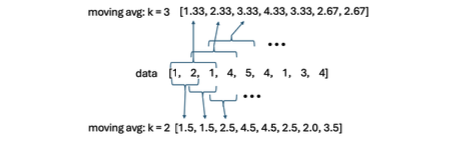

**Task**: Write the code for the following function. It should work with **any** sized input of data and weights.

```python
def weighted_moving_avg(data, weights):
    '''
    (list of float, list of float) -> list of float

    Returns the weighted moving average of the data using
    the given list of weights.

    If k (the length of 'weights') is larger than the length
    of 'data', an empty list is returned.
    '''
    
```



In [1]:
def weighted_moving_avg(data, weights):
    '''
    (list of float, list of float) -> list of float

    Returns the weighted moving average of the data using
    the given list of weights.

    If k (the length of 'weights') is larger than the length
    of 'data', an empty list is returned.
    
    For each index i, if i < k-1 then only the first i+1 data points
    (with their corresponding weights) are used.
    '''
    k = len(weights)
    n = len(data)
    
    # If the window size is larger than the available data, return an empty list
    if k > n:
        return []
    
    result = []
    # For each data point at index i, compute the weighted moving average
    for i in range(n):
        # Determine how many data points are available up to index i.
        # For i < k-1, we only have i+1 data points; otherwise, use k data points.
        window_size = min(i + 1, k)
        
        # Compute the sum of weights for the current window
        total_weight = sum(weights[:window_size])
        weighted_sum = 0.0
        
        # For each data point in the current window,
        # multiply the corresponding weight with the data value.
        # Note: weights[0] is used for the most recent data (at index i),
        # weights[1] for data at index i-1, etc.
        for j in range(window_size):
            weighted_sum += weights[j] * data[i - j]
        
        # Append the weighted average for index i to the result list
        result.append(weighted_sum / total_weight)
    
    return result

In [2]:
sample_data = [1.0, 2.0, 3.5, 2.9, 3.0, 2.7, 3.2]
weights = [1, 2, 3]  # example weights
print("Weighted Moving Average:", weighted_moving_avg(sample_data, weights))


Weighted Moving Average: [1.0, 1.3333333333333333, 1.75, 2.65, 3.216666666666667, 2.9, 2.9333333333333336]


#### Part B: Level Crossing

Define a function that detects when the data crosses above a threshold T. Specifically, we say the sequence crosses above T between indices i-1 and i if:

$\text{data}[i-1] < T \text{ and } \text{data}[i] \geq T$

For the first element ((i=0)), you may ignore crossing detection because there is no prior element.

Task: Write a function that returns a list of all indices i where a crossing from below to above T is detected.

```python
def level_crossings(data, threshold):
    '''
    (list of float, float) -> list of int

    Returns a list of indices i where the data sequence 
    crosses from below threshold to >= threshold.
    '''
    
```

Example:
- If data = [1.5, 2.1, 2.9, 3.0, 2.7, 3.2] and threshold = 3.0,
- The crossing occurs between indices 2 and 3 (i.e., from data[2] = 2.9 to data[3] = 3.0), so we would include 3 in the output list.
- Another crossing occurs from data[4] = 2.7 to data[5] = 3.2, so we include 5.
- Hence, level_crossings(data, 3.0) would return [3, 5].

In [2]:
def level_crossings(data, threshold):
    """
    (list of float, float) -> list of int

    Returns a list of indices i where the sequence crosses from 
    below the threshold to >= threshold between i-1 and i.
    """
    crossing_indices = []

    # Start from i = 1 because we need to compare data[i-1] and data[i]
    for i in range(1, len(data)):
        if data[i - 1] < threshold <= data[i]:
            crossing_indices.append(i)

    return crossing_indices

In [3]:
sample_data = [1.0, 2.0, 3.5, 2.9, 3.0, 2.7, 3.2]
threshold = 3.0
crosses = level_crossings(sample_data, threshold)
print("Level crossings:", crosses)

Level crossings: [2, 4, 6]


**Summary**:  
In this tutorial, you learned:
- How to use the `csv` module for basic CSV operations.
- How Pandas provides a more convenient approach to data analysis.
- How to leverage OOP concepts (constructors, instance methods, and `__str__`) to build more robust and extensible Python applications.  

Work through the practice problems to solidify your understanding, and remember to get creative with your examples to keep them engaging and relevant to engineering scenarios or real-world use cases!


In [10]:
# file cleaning
import os

files2remove = ['library_books_updated.csv', 'filtered_sensor_data.csv', 'new_student_grades.csv', 'stats.txt', 'student_grades_with_avg.csv']
for file in files2remove:
    if os.path.exists(file):
        os.remove(file)
